In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,9/1/2019,england,249942,E92000001,64605.0,NaN
13545,10/1/2019,england,249376,E92000001,68677.0,NaN
13546,11/1/2019,england,248515,E92000001,67814.0,NaN
13547,12/1/2019,england,250410,E92000001,NaN,NaN


In [4]:
data.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


In [5]:
# 1. Summary statistics of the dataset
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       average_price    houses_sold  no_of_crimes
count   1.354900e+04   13455.000000   7439.000000
mean    2.635197e+05    3893.994129   2158.352063
std     1.876175e+05   12114.402476    902.087742
min     4.072200e+04       2.000000      0.000000
25%     1.323800e+05     247.000000   1623.000000
50%     2.229190e+05     371.000000   2132.000000
75%     3.368430e+05    3146.000000   2582.000000
max     1.463378e+06  132163.000000   7461.000000


In [6]:
# 2. Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64


In [7]:
# 3. Count of unique areas
unique_areas = data['area'].nunique()
print(f"\nNumber of unique areas: {unique_areas}")


Number of unique areas: 45


In [10]:
# 4. Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN
...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN
13545,2019-10-01,england,249376,E92000001,68677.0,NaN
13546,2019-11-01,england,248515,E92000001,67814.0,NaN
13547,2019-12-01,england,250410,E92000001,NaN,NaN


In [17]:
# Group by year and calculate the mean of average_price for each year
yearly_avg_price = data.groupby('year')['average_price'].mean()

# Calculate the year-over-year percentage growth in house prices
yearly_growth = yearly_avg_price.pct_change() * 100

# Display the yearly average house prices and percentage growth
print("\nYearly Average House Prices:")
print(yearly_avg_price)

print("\nYear-over-Year Percentage Growth in House Prices:")
print(yearly_growth)



Yearly Average House Prices:
year
1995     75880.235185
1996     78875.274908
1997     89618.350000
1998    101747.073801
1999    114256.172222
2000    139979.442593
2001    156932.355556
2002    182190.731481
2003    205099.553704
2004    224604.720370
2005    233314.512963
2006    249303.109259
2007    285944.279630
2008    287478.972222
2009    259296.896296
2010    287559.164815
2011    294819.138889
2012    309409.501852
2013    334589.564815
2014    388208.392593
2015    421356.100000
2016    454884.461111
2017    469978.938889
2018    467240.674074
2019    460056.659259
2020    463329.977778
Name: average_price, dtype: float64

Year-over-Year Percentage Growth in House Prices:
year
1995          NaN
1996     3.947062
1997    13.620333
1998    13.533750
1999    12.294308
2000    22.513681
2001    12.111002
2002    16.095072
2003    12.574088
2004     9.510097
2005     3.877831
2006     6.852808
2007    14.697438
2008     0.536710
2009    -9.803178
2010    10.899578
2011     2.52

In [16]:
# Extract the month and year from the date
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Group by month and calculate the mean of average_price
monthly_avg_price = data.groupby('month')['average_price'].mean()

# Display the monthly average house prices
print("\nAverage House Prices by Month:")
print(monthly_avg_price)



Average House Prices by Month:
month
1     262785.685470
2     255134.094942
3     256140.015111
4     257506.877551
5     259872.709333
6     262387.952000
7     265385.471111
8     267579.394667
9     269151.498667
10    268620.352889
11    268663.659556
12    269063.457778
Name: average_price, dtype: float64


In [12]:
# Group by area and calculate mean average price
average_price_by_area = data.groupby('area')['average_price'].mean().sort_values(ascending=False)

# Display the top 5 areas with highest average house prices
top_5_areas = average_price_by_area.head(5)
print("\nTop 5 Areas with Highest Average House Prices:")
print(top_5_areas)



Top 5 Areas with Highest Average House Prices:
area
kensington and chelsea    742060.368771
westminster               543865.936877
camden                    467500.910299
hammersmith and fulham    443791.860465
city of london            423942.584718
Name: average_price, dtype: float64


In [14]:
# Group by area and sum up the total houses sold
total_houses_sold_by_area = data.groupby('area')['houses_sold'].sum().sort_values(ascending=False)

# Display the top 5 areas with the most houses sold
print("\nTop 5 Areas with the Most Houses Sold:")
print(total_houses_sold_by_area.head(5))


Top 5 Areas with the Most Houses Sold:
area
england            23078379.0
south east          4196229.0
london              3135120.0
north west          2896022.0
east of england     2810542.0
Name: houses_sold, dtype: float64


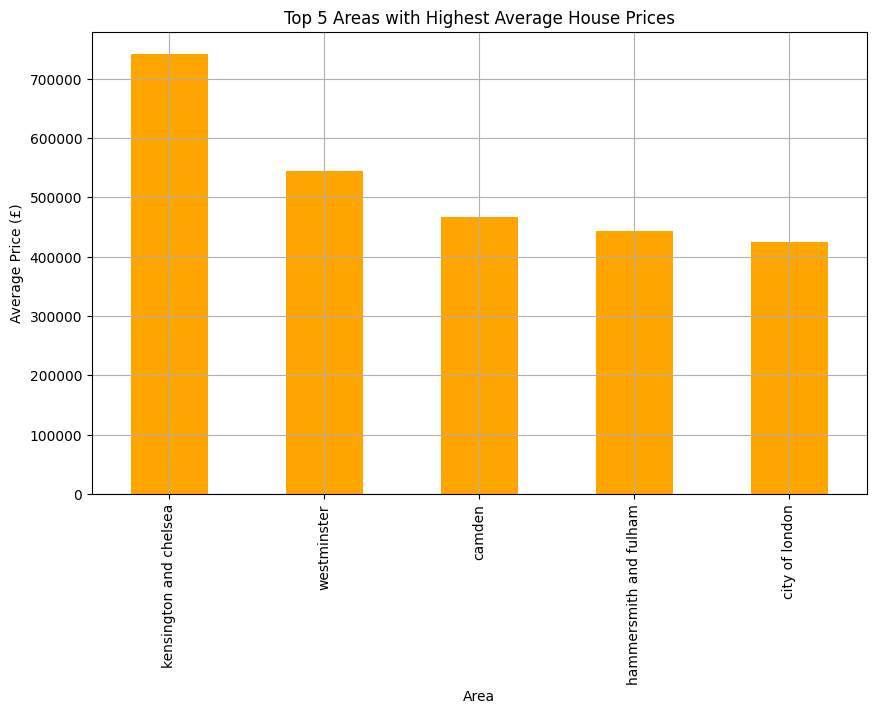

In [18]:
# Group by area and calculate the mean of average_price for each area
area_avg_price = data.groupby('area')['average_price'].mean().sort_values(ascending=False)

# Select the top 5 areas
top_5_areas = area_avg_price.head(5)

# Plot the bar chart
top_5_areas.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 5 Areas with Highest Average House Prices')
plt.xlabel('Area')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.show()


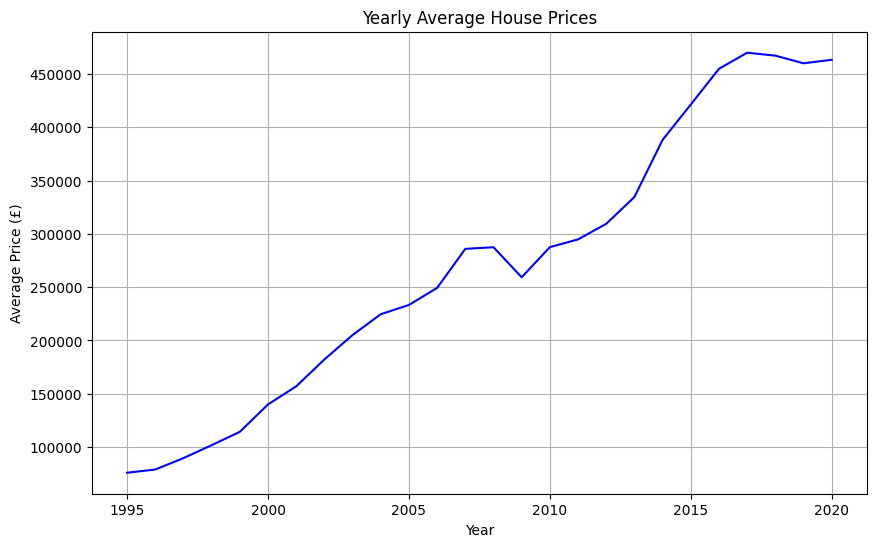

In [19]:
# Group by year and calculate the mean of average_price for each year
yearly_avg_price = data.groupby('year')['average_price'].mean()

# Plot the line chart
yearly_avg_price.plot(kind='line', color='blue', figsize=(10, 6))
plt.title('Yearly Average House Prices')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.show()


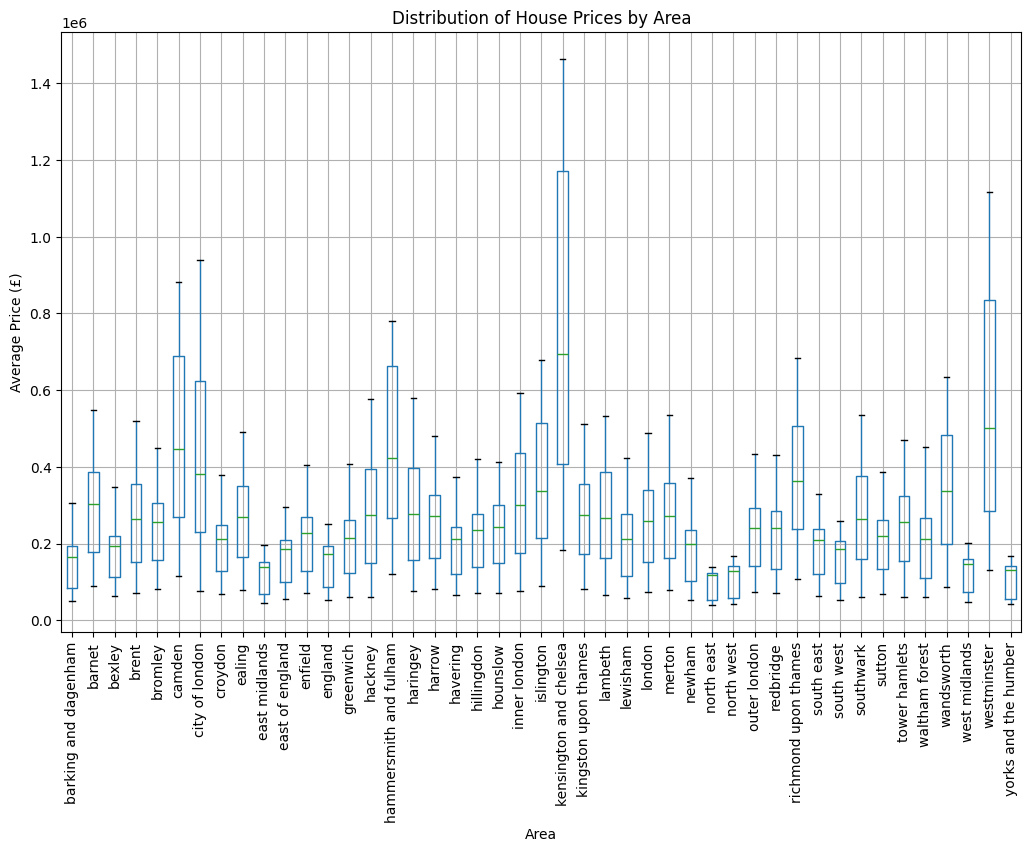

In [20]:
# Create a box plot for house prices in different areas
data.boxplot(column='average_price', by='area', figsize=(12, 8), rot=90)
plt.title('Distribution of House Prices by Area')
plt.suptitle('')
plt.xlabel('Area')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.show()


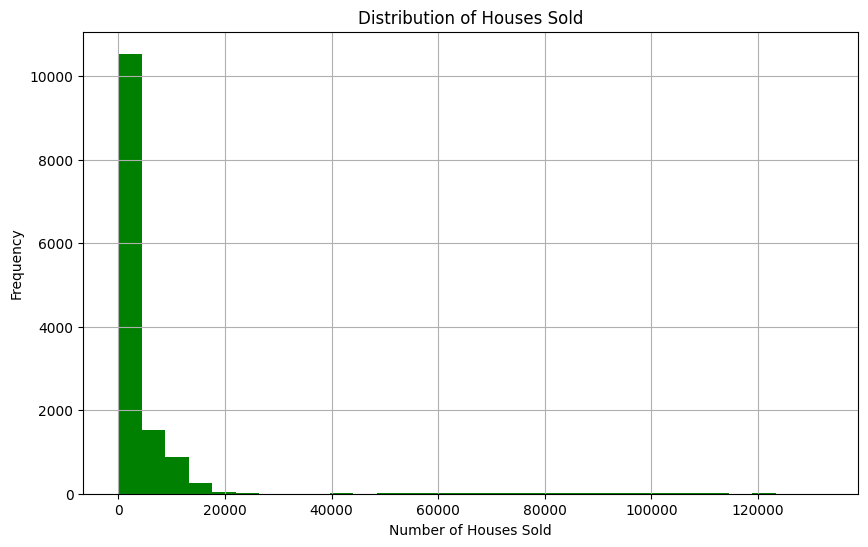

In [21]:
# Plot the histogram
data['houses_sold'].plot(kind='hist', bins=30, color='green', figsize=(10, 6))
plt.title('Distribution of Houses Sold')
plt.xlabel('Number of Houses Sold')
plt.grid(True)
plt.show()


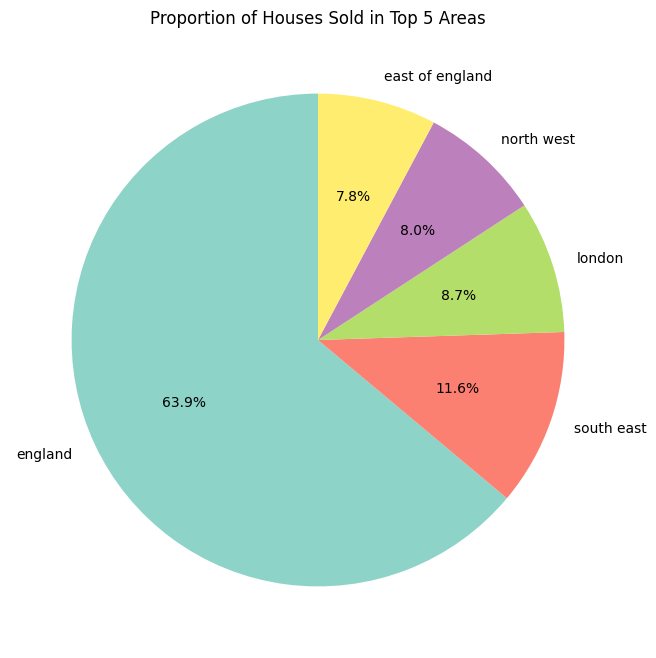

In [22]:
# Group by area and sum the number of houses sold
area_houses_sold = data.groupby('area')['houses_sold'].sum().sort_values(ascending=False)

# Select the top 5 areas
top_5_houses_sold = area_houses_sold.head(5)

# Plot the pie chart
top_5_houses_sold.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='Set3')
plt.title('Proportion of Houses Sold in Top 5 Areas')
plt.ylabel('')  # Hide the y-label
plt.show()
